In [1]:
import numpy as np 
import scipy.stats
import pandas as pd
import scanpy as sc
import goatools
import seaborn as sns
import matplotlib.pyplot as plt

In [954]:
import matplotlib 
matplotlib.rc_file_defaults()

In [2]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

In [859]:
adata_joanito = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.preprocessed.NanoMnT.ManualAnnot.h5ad')

In [860]:
dict_Identifier_to_lvl_1_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl1.pickle')

dict_Identifier_to_lvl_2_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl2.pickle')

dict_Identifier_to_lvl_1_CellType_Total,  dict_Identifier_to_lvl_2_CellType_Total = dict(), dict()

for k,v in dict_Identifier_to_lvl_1_CellType_1.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_2.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_3.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v

for k,v in dict_Identifier_to_lvl_2_CellType_1.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_2.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_3.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v

In [861]:
lvl1_celltype = list()
lvl2_celltype = list()

for tup in adata_joanito.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'Tumor epithelial':
        lvl1_celltype.append('Epithelial')
        lvl2_celltype.append('Tumor epithelial')
    elif tup.Manual_CellType_lvl_1 == 'Normal epithelial':
        lvl1_celltype.append('Epithelial')
        lvl2_celltype.append(dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier])
    else:
        lvl1_celltype.append(dict_Identifier_to_lvl_1_CellType_Total[tup.Identifier])
        lvl2_celltype.append(dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier])

In [862]:
adata_joanito.obs['Manual_CellType_lvl_1'] = lvl1_celltype
adata_joanito.obs['Manual_CellType_lvl_2'] = lvl2_celltype

In [863]:
dict_BiopsySite_to_BiopsySite2 = {
    'Adjacent normal tissue' : 'Normal',
    'Normal' : 'Normal',
    'Core' : 'Tumor',
    'Tumor' : 'Tumor',
    'Invasive' : 'Tumor',
    'LymphNode' : 'LymphNode',
}

adata_joanito.obs['BiopsySite2'] = [ dict_BiopsySite_to_BiopsySite2[BS] for BS in adata_joanito.obs['BiopsySite'] ]

In [864]:
adata_joanito_tumorSamples  = adata_joanito[adata_joanito.obs['BiopsySite2']=='Tumor'].copy()
adata_joanito_normalSamples = adata_joanito[adata_joanito.obs['BiopsySite2']!='Tumor'].copy()

In [237]:
PatientOrder = ['CRC2817', 'CRC2783', 'SC035', 'SC044']

## Estimate MSI intensity

In [951]:
adata_joanito_tumorSamples

AnnData object with n_obs × n_vars = 60275 × 2000
    obs: 'doublet_score', 'predicted_doublet', 'SampleID', 'PatientID', 'BiopsySite', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'Identifier', 'Author_CellType_lvl_1', 'Author_CellType_lvl_2', 'n_genes', 'leiden', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci', 'MSI', 'Manual_CellType_lvl_1', 'Manual_CellType_lvl_2', 'BiopsySite2'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Author_CellType_lvl_1_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'Manual_CellType_lvl_2_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [354]:
adata_joanito_tumorSamples_tumorEpi = adata_joanito_tumorSamples[(adata_joanito_tumorSamples.obs['Manual_CellType_lvl_2']=='Tumor epithelial') &
                                                                 (adata_joanito_tumorSamples.obs['MSI']=='MSI-H')].copy()
adata_joanito_tumorSamples_tumorEpi = adata_joanito_tumorSamples_tumorEpi.raw.to_adata()
sc.pp.normalize_total(adata_joanito_tumorSamples_tumorEpi)
sc.pp.log1p(adata_joanito_tumorSamples_tumorEpi)

adata_joanito_normalSamples_normalEpi = adata_joanito_normalSamples[(adata_joanito_normalSamples.obs['Manual_CellType_lvl_1']=='Epithelial') & 
                                                                  (adata_joanito_normalSamples.obs['Manual_CellType_lvl_2']!='Tumor epithelial') &
                                                                 (adata_joanito_normalSamples.obs['MSI']=='MSI-H')].copy()
adata_joanito_normalSamples_normalEpi = adata_joanito_normalSamples_normalEpi.raw.to_adata()
sc.pp.normalize_total(adata_joanito_normalSamples_normalEpi)
sc.pp.log1p(adata_joanito_normalSamples_normalEpi)

In [988]:
MSI_intensity_positive_correlation_genes = [ 'RGMB', 'PRUNE2' ]
MSI_intensity_negative_correlation_genes = [ 'S100A6', 'S100P', 'CRIP1', 'DST' ]
sc.tl.score_genes(adata_joanito_tumorSamples_tumorEpi, MSI_intensity_positive_correlation_genes, score_name='MSI-intensity_pos_cor')
sc.tl.score_genes(adata_joanito_tumorSamples_tumorEpi, MSI_intensity_negative_correlation_genes, score_name='MSI-intensity_neg_cor')


In [990]:
sc.tl.score_genes(adata_chen_tumorSamples_tumorEpi, MSI_intensity_positive_correlation_genes, score_name='MSI-intensity_pos_cor')
sc.tl.score_genes(adata_chen_tumorSamples_tumorEpi, MSI_intensity_negative_correlation_genes, score_name='MSI-intensity_neg_cor')

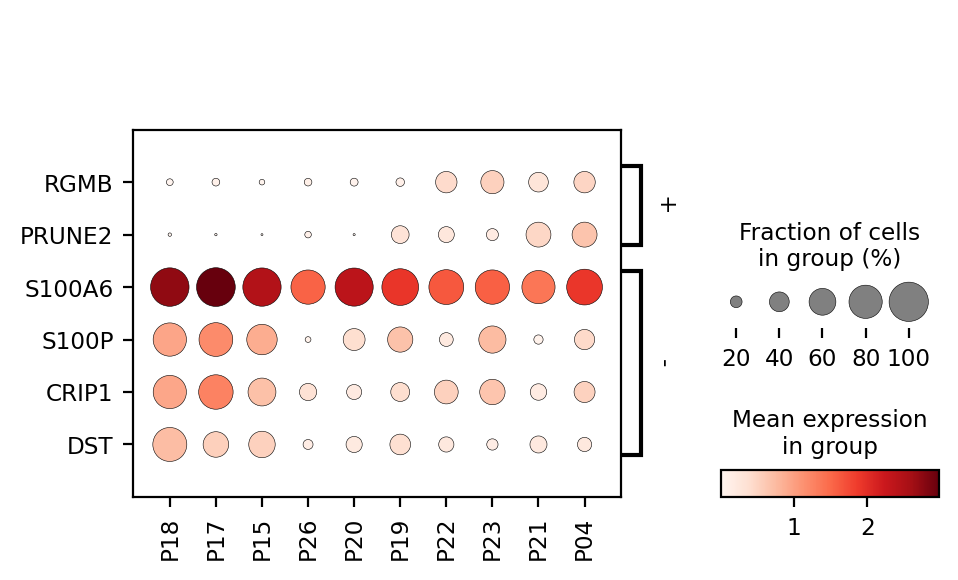

In [994]:
sc.pl.dotplot(adata_chen_tumorSamples_tumorEpi, 
                     var_names={ '+' : MSI_intensity_positive_correlation_genes, '-' : MSI_intensity_negative_correlation_genes }, 
                     groupby='PatientID', categories_order=chen_patient_order_by_MSI_intensity, swap_axes=True,
                     )

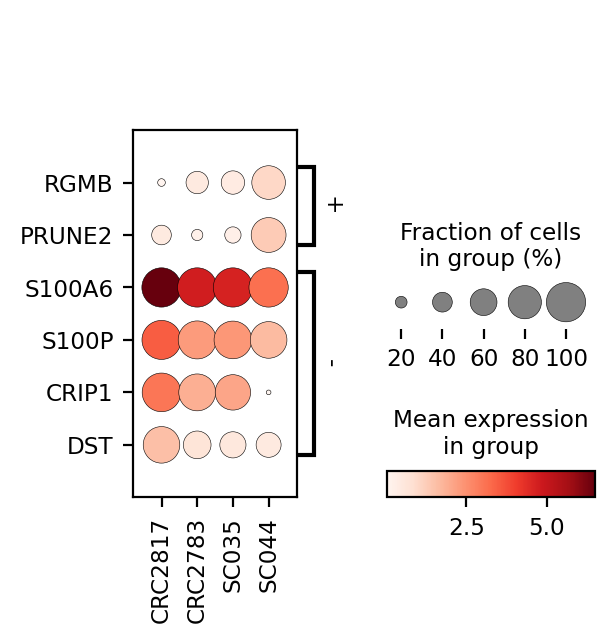

In [989]:
sc.pl.dotplot(adata_joanito_tumorSamples_tumorEpi, 
                     var_names={ '+' : MSI_intensity_positive_correlation_genes, '-' : MSI_intensity_negative_correlation_genes }, 
                     groupby='PatientID', categories_order=PatientOrder, swap_axes=True,)

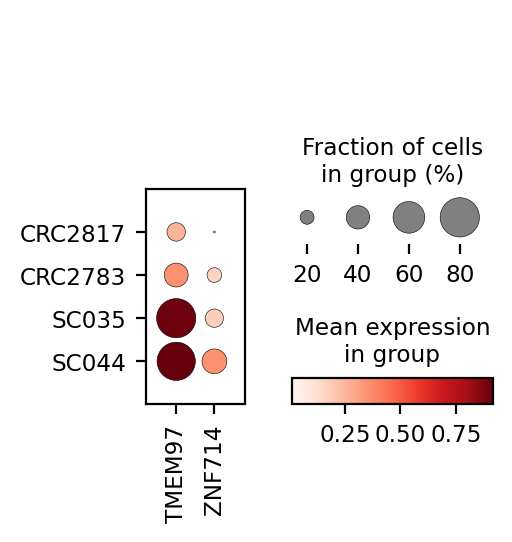

In [999]:
sc.pl.dotplot(adata_joanito_tumorSamples_tumorEpi, var_names=['TMEM97', 'ZNF714'], groupby='PatientID', categories_order=PatientOrder)

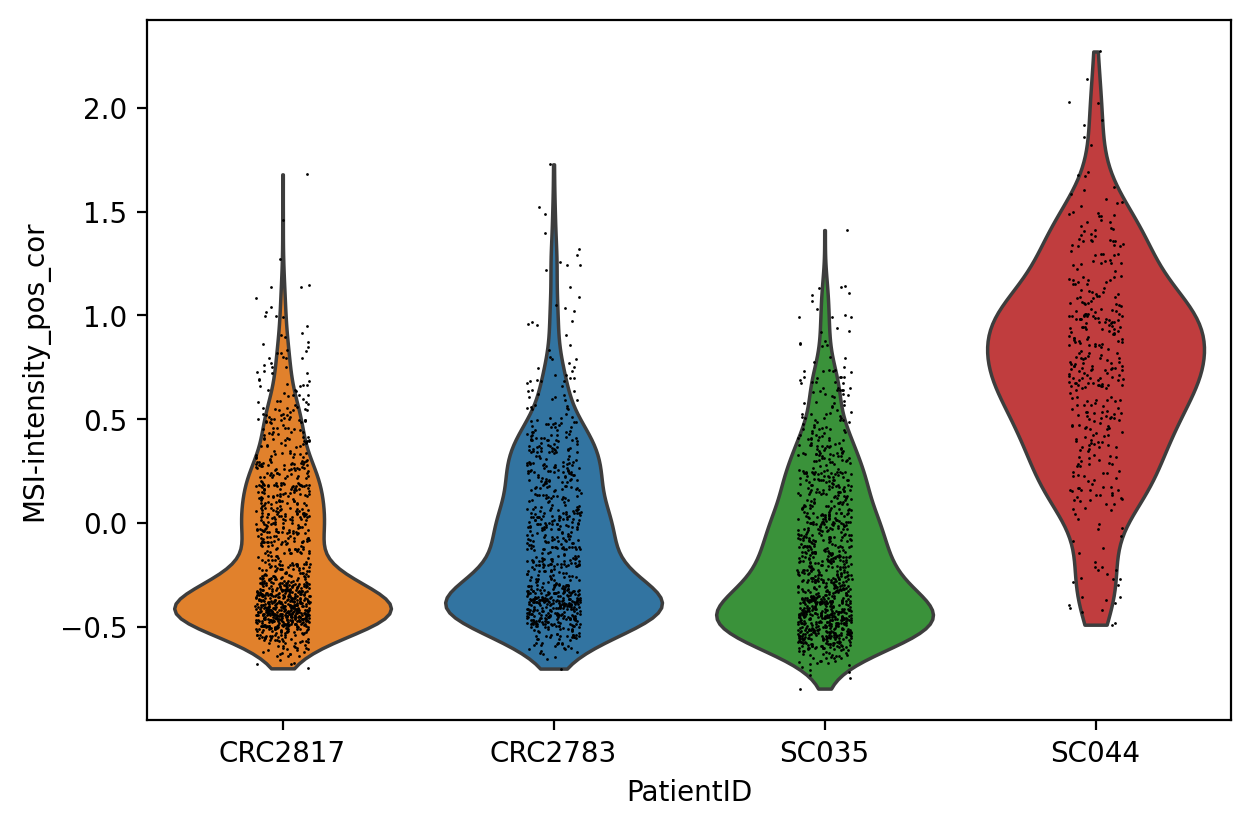

In [978]:
sc.pl.violin(adata_joanito_tumorSamples_tumorEpi, keys=['MSI-intensity_pos_cor'], groupby='PatientID', order=PatientOrder)

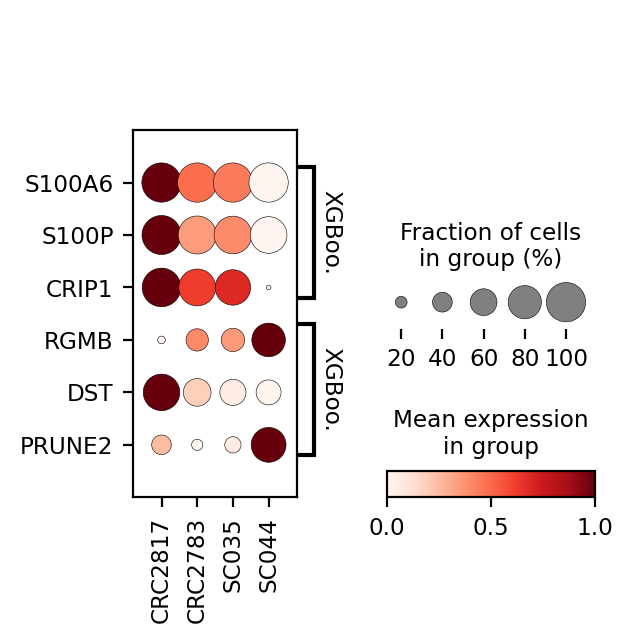

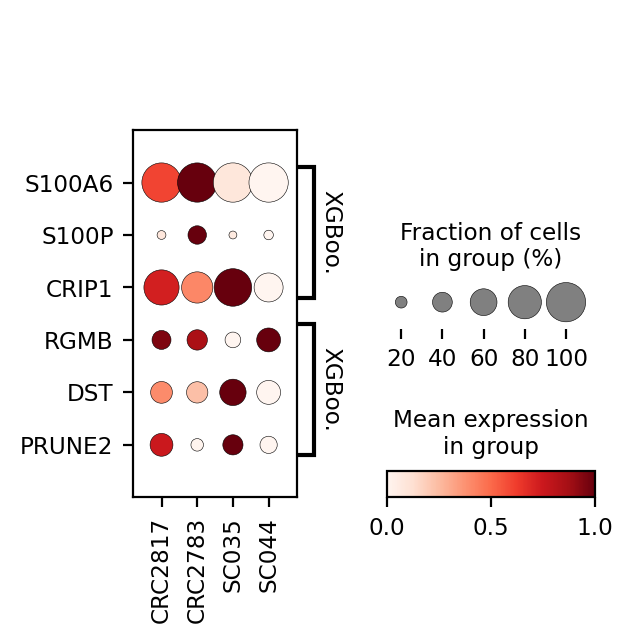

In [974]:
sc.pl.dotplot(adata_joanito_tumorSamples_tumorEpi, 
              var_names={'XGBoost-Joanito' : ['S100A6', 'S100P', 'CRIP1'], 'XGBoost-Chen' : ['RGMB', 'DST', 'PRUNE2'],}, 
              groupby='PatientID', categories_order=['CRC2817','CRC2783',  'SC035', 'SC044'], 
              swap_axes=True, standard_scale='var',)
sc.pl.dotplot(adata_joanito_normalSamples_normalEpi, 
              var_names={'XGBoost-Joanito' : ['S100A6', 'S100P', 'CRIP1'], 'XGBoost-Chen' : ['RGMB', 'DST', 'PRUNE2'],}, 
              groupby='PatientID', categories_order=['CRC2817','CRC2783',  'SC035', 'SC044'], 
              swap_axes=True,standard_scale='var',)

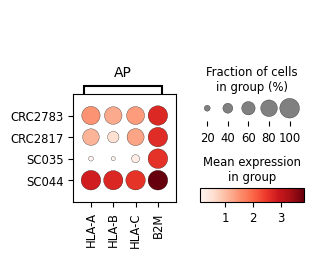

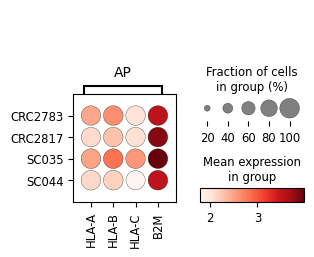

In [355]:
sc.pl.dotplot(adata_joanito_tumorSamples_tumorEpi, var_names={'AP' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M']}, groupby='PatientID')
sc.pl.dotplot(adata_joanito_normalSamples_normalEpi, var_names={'AP' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M']}, groupby='PatientID')

### cMS gene expressoin

In [168]:
PutativeNeoantigens = pd.read_csv('/node200data/18parkky/datasets/data/FGL/processed_data/cMS_analysis/PutativeNeoproteins.tsv', sep='\t')

In [229]:
dict_cMSlength_to_gene = { RepeatLength : list(set(edf['gene'])) for RepeatLength, edf in PutativeNeoantigens.groupby('RepeatLength') }
min_cMS_length = 21
cMS_genes = list()
for cMS_length in range( min_cMS_length, min_cMS_length+1000 ):
    try:
        for g in dict_cMSlength_to_gene[cMS_length]:
            cMS_genes.append( g )
    except KeyError: continue
len(cMS_genes)

3

In [230]:
sc.tl.score_genes(adata_joanito_tumorSamples_tumorEpi, cMS_genes, score_name='cMS_expression_score')

In [231]:
dict_PatientID_to_cMSscore = dict()
for PatientID, edf in adata_joanito_tumorSamples_tumorEpi.obs.groupby('PatientID'):
    dict_PatientID_to_cMSscore[PatientID] = np.mean(edf['cMS_expression_score'])

/tmp/ipykernel_148363/1220276601.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for PatientID, edf in adata_joanito_tumorSamples_tumorEpi.obs.groupby('PatientID'):


### Antigen-presentation expression

In [203]:
APG = [
    'HLA-A',
    'HLA-B',
    'HLA-C',
    'B2M',
    
    'TAP1',
    'TAP2',
    'TAPBP',
    'CALR',
    'PDIA3',
]

sc.tl.score_genes(adata_joanito_tumorSamples_tumorEpi, APG, score_name='AP_score')

dict_PatientID_to_APscore = dict()
for PatientID, edf in adata_joanito_tumorSamples_tumorEpi.obs.groupby('PatientID'):
    dict_PatientID_to_APscore[PatientID] = np.mean(edf['AP_score'])

/tmp/ipykernel_148363/2003867737.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for PatientID, edf in adata_joanito_tumorSamples_tumorEpi.obs.groupby('PatientID'):


### Final score

In [204]:
dict_PatientID_to_AvgSTRDiff = { PatientID : np.mean(edf[edf['NumSTRLoci']>=1]['AvgSTRDiff']) for PatientID, edf in adata_joanito_tumorSamples_tumorEpi.obs.groupby('PatientID') }

/tmp/ipykernel_148363/799955706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_PatientID_to_AvgSTRDiff = { PatientID : np.mean(edf[edf['NumSTRLoci']>=1]['AvgSTRDiff']) for PatientID, edf in adata_joanito_tumorSamples_tumorEpi.obs.groupby('PatientID') }


In [234]:
dict_PatientID_to_MSIscore = dict()
for PatientID, score in dict_PatientID_to_AvgSTRDiff.items():
    dict_PatientID_to_MSIscore[PatientID] = abs(score) * abs(dict_PatientID_to_cMSscore[PatientID]) * abs(dict_PatientID_to_APscore[PatientID])

In [235]:
dict_PatientID_to_MSIscore

{'CRC2783': 0.06881393477601637,
 'CRC2817': 0.07735174158781881,
 'SC035': 0.01815718166108866,
 'SC044': 0.2543273443642335}

## CD8+ T cells

In [866]:
adata_joanito_tumorSamples_CD8T = adata_joanito_tumorSamples[(adata_joanito_tumorSamples.obs['Manual_CellType_lvl_2']=='CD8+ T') & 
                                                             (adata_joanito_tumorSamples.obs['MSI']=='MSI-H') & 
                                                             (adata_joanito_tumorSamples.obs['PatientID']!='SC035')].copy()
adata_joanito_tumorSamples_CD8T = adata_joanito_tumorSamples_CD8T.raw.to_adata()
sc.pp.normalize_total(adata_joanito_tumorSamples_CD8T)
sc.pp.log1p(adata_joanito_tumorSamples_CD8T)
adata_joanito_tumorSamples_CD8T

AnnData object with n_obs × n_vars = 3655 × 29511
    obs: 'doublet_score', 'predicted_doublet', 'SampleID', 'PatientID', 'BiopsySite', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'Identifier', 'Author_CellType_lvl_1', 'Author_CellType_lvl_2', 'n_genes', 'leiden', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci', 'MSI', 'Manual_CellType_lvl_1', 'Manual_CellType_lvl_2', 'BiopsySite2'
    var: 'n_cells'
    uns: 'Author_CellType_lvl_1_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'Manual_CellType_lvl_2_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [867]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata_joanito_tumorSamples_CD8T.var["mt"] = adata_joanito_tumorSamples_CD8T.var_names.str.startswith("MT-")
# ribosomal genes
adata_joanito_tumorSamples_CD8T.var["ribo"] = adata_joanito_tumorSamples_CD8T.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata_joanito_tumorSamples_CD8T.var["hb"] = adata_joanito_tumorSamples_CD8T.var_names.str.contains("^HB[^(P)]")

In [868]:
adata_joanito_tumorSamples_CD8T = adata_joanito_tumorSamples_CD8T[:, adata_joanito_tumorSamples_CD8T.var[(adata_joanito_tumorSamples_CD8T.var['mt']==False) & (adata_joanito_tumorSamples_CD8T.var['ribo']==False)].index].copy()

In [869]:
sc.tl.rank_genes_groups(adata_joanito_tumorSamples_CD8T, groupby='PatientID', method='logreg')

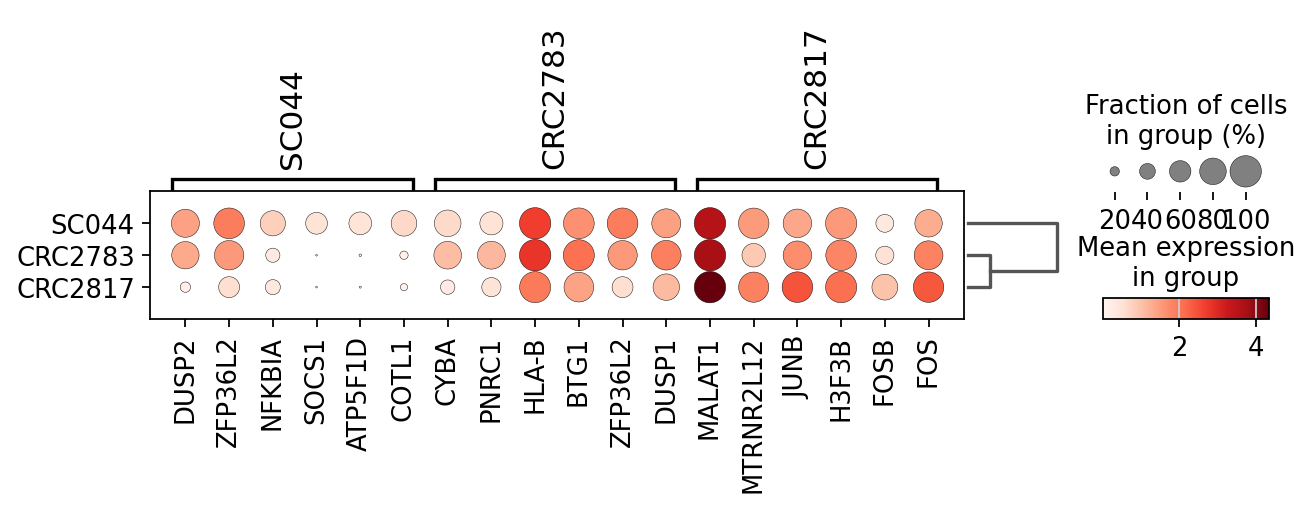

In [870]:
sc.pl.rank_genes_groups_dotplot(adata_joanito_tumorSamples_CD8T, groupby='PatientID', n_genes=6, swap_axes=False,)

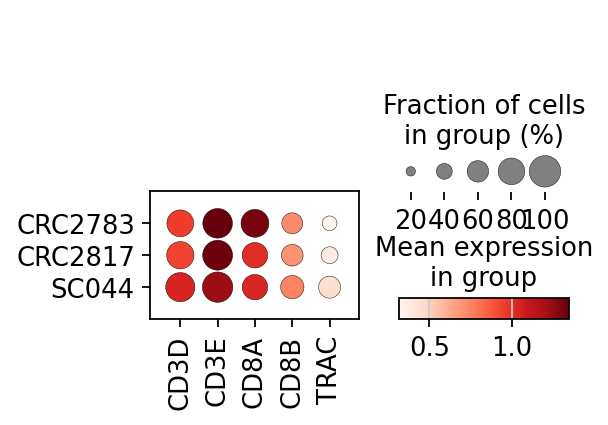

In [902]:
sc.pl.dotplot(adata_joanito_tumorSamples_CD8T, var_names=['CD3D', 'CD3E', 'CD8A', 'CD8B', 'TRAC', ], groupby='PatientID')

### Activation markers

In [ ]:
# GO:0002308

In [939]:
activation_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM', 'PRF1']
naive_genes = ['CCR7', 'SELL', 'IL7R', 'LEF1', 'TCF7']

# cytotoxic_genes = ['HAVCR2', 'LAYN', 'LAG3', 'GZMA', 'GZMB', 'FASLG', 'GNLY', 'ENTPD1', 'NKG7', ]
# native_genes    = ['SELL', 'CCR7', 'IL7R', 'TCF7', 'LEF1',]

sc.tl.score_genes(adata_joanito_tumorSamples_CD8T, gene_list=cytotoxic_genes, score_name='CytotoxicScore')
sc.tl.score_genes(adata_joanito_tumorSamples_CD8T, gene_list=native_genes, score_name='NativeScore')

In [940]:
dict_genes = {
    'Cytotoxic' : cytotoxic_genes,
    'Native' : native_genes,
}

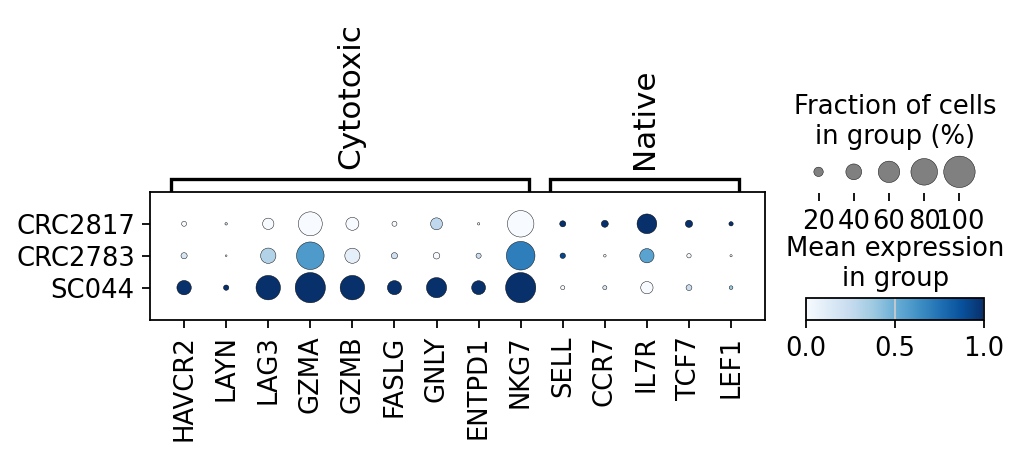

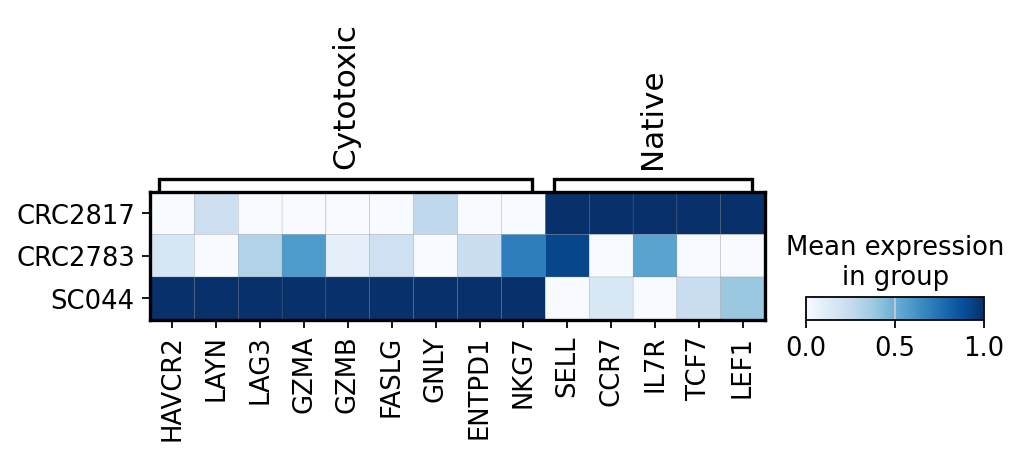

In [941]:
sc.set_figure_params(transparent=True)
sc.pl.dotplot(adata_joanito_tumorSamples_CD8T, 
                 var_names=dict_genes, 
                 groupby='PatientID',
                 categories_order=['CRC2817', 'CRC2783', 'SC044'], 
                 swap_axes=False, 
                 standard_scale='var',
                 cmap='Blues',
                 )
sc.set_figure_params(transparent=True)
sc.pl.matrixplot(adata_joanito_tumorSamples_CD8T, 
                 var_names=dict_genes, 
                 groupby='PatientID',
                 categories_order=['CRC2817', 'CRC2783', 'SC044'], 
                 swap_axes=False, 
                 standard_scale='var',
                 cmap='Blues',
                 )

In [624]:
sns.color_palette('tab20c')

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

In [669]:
sns.set_style('whitegrid')

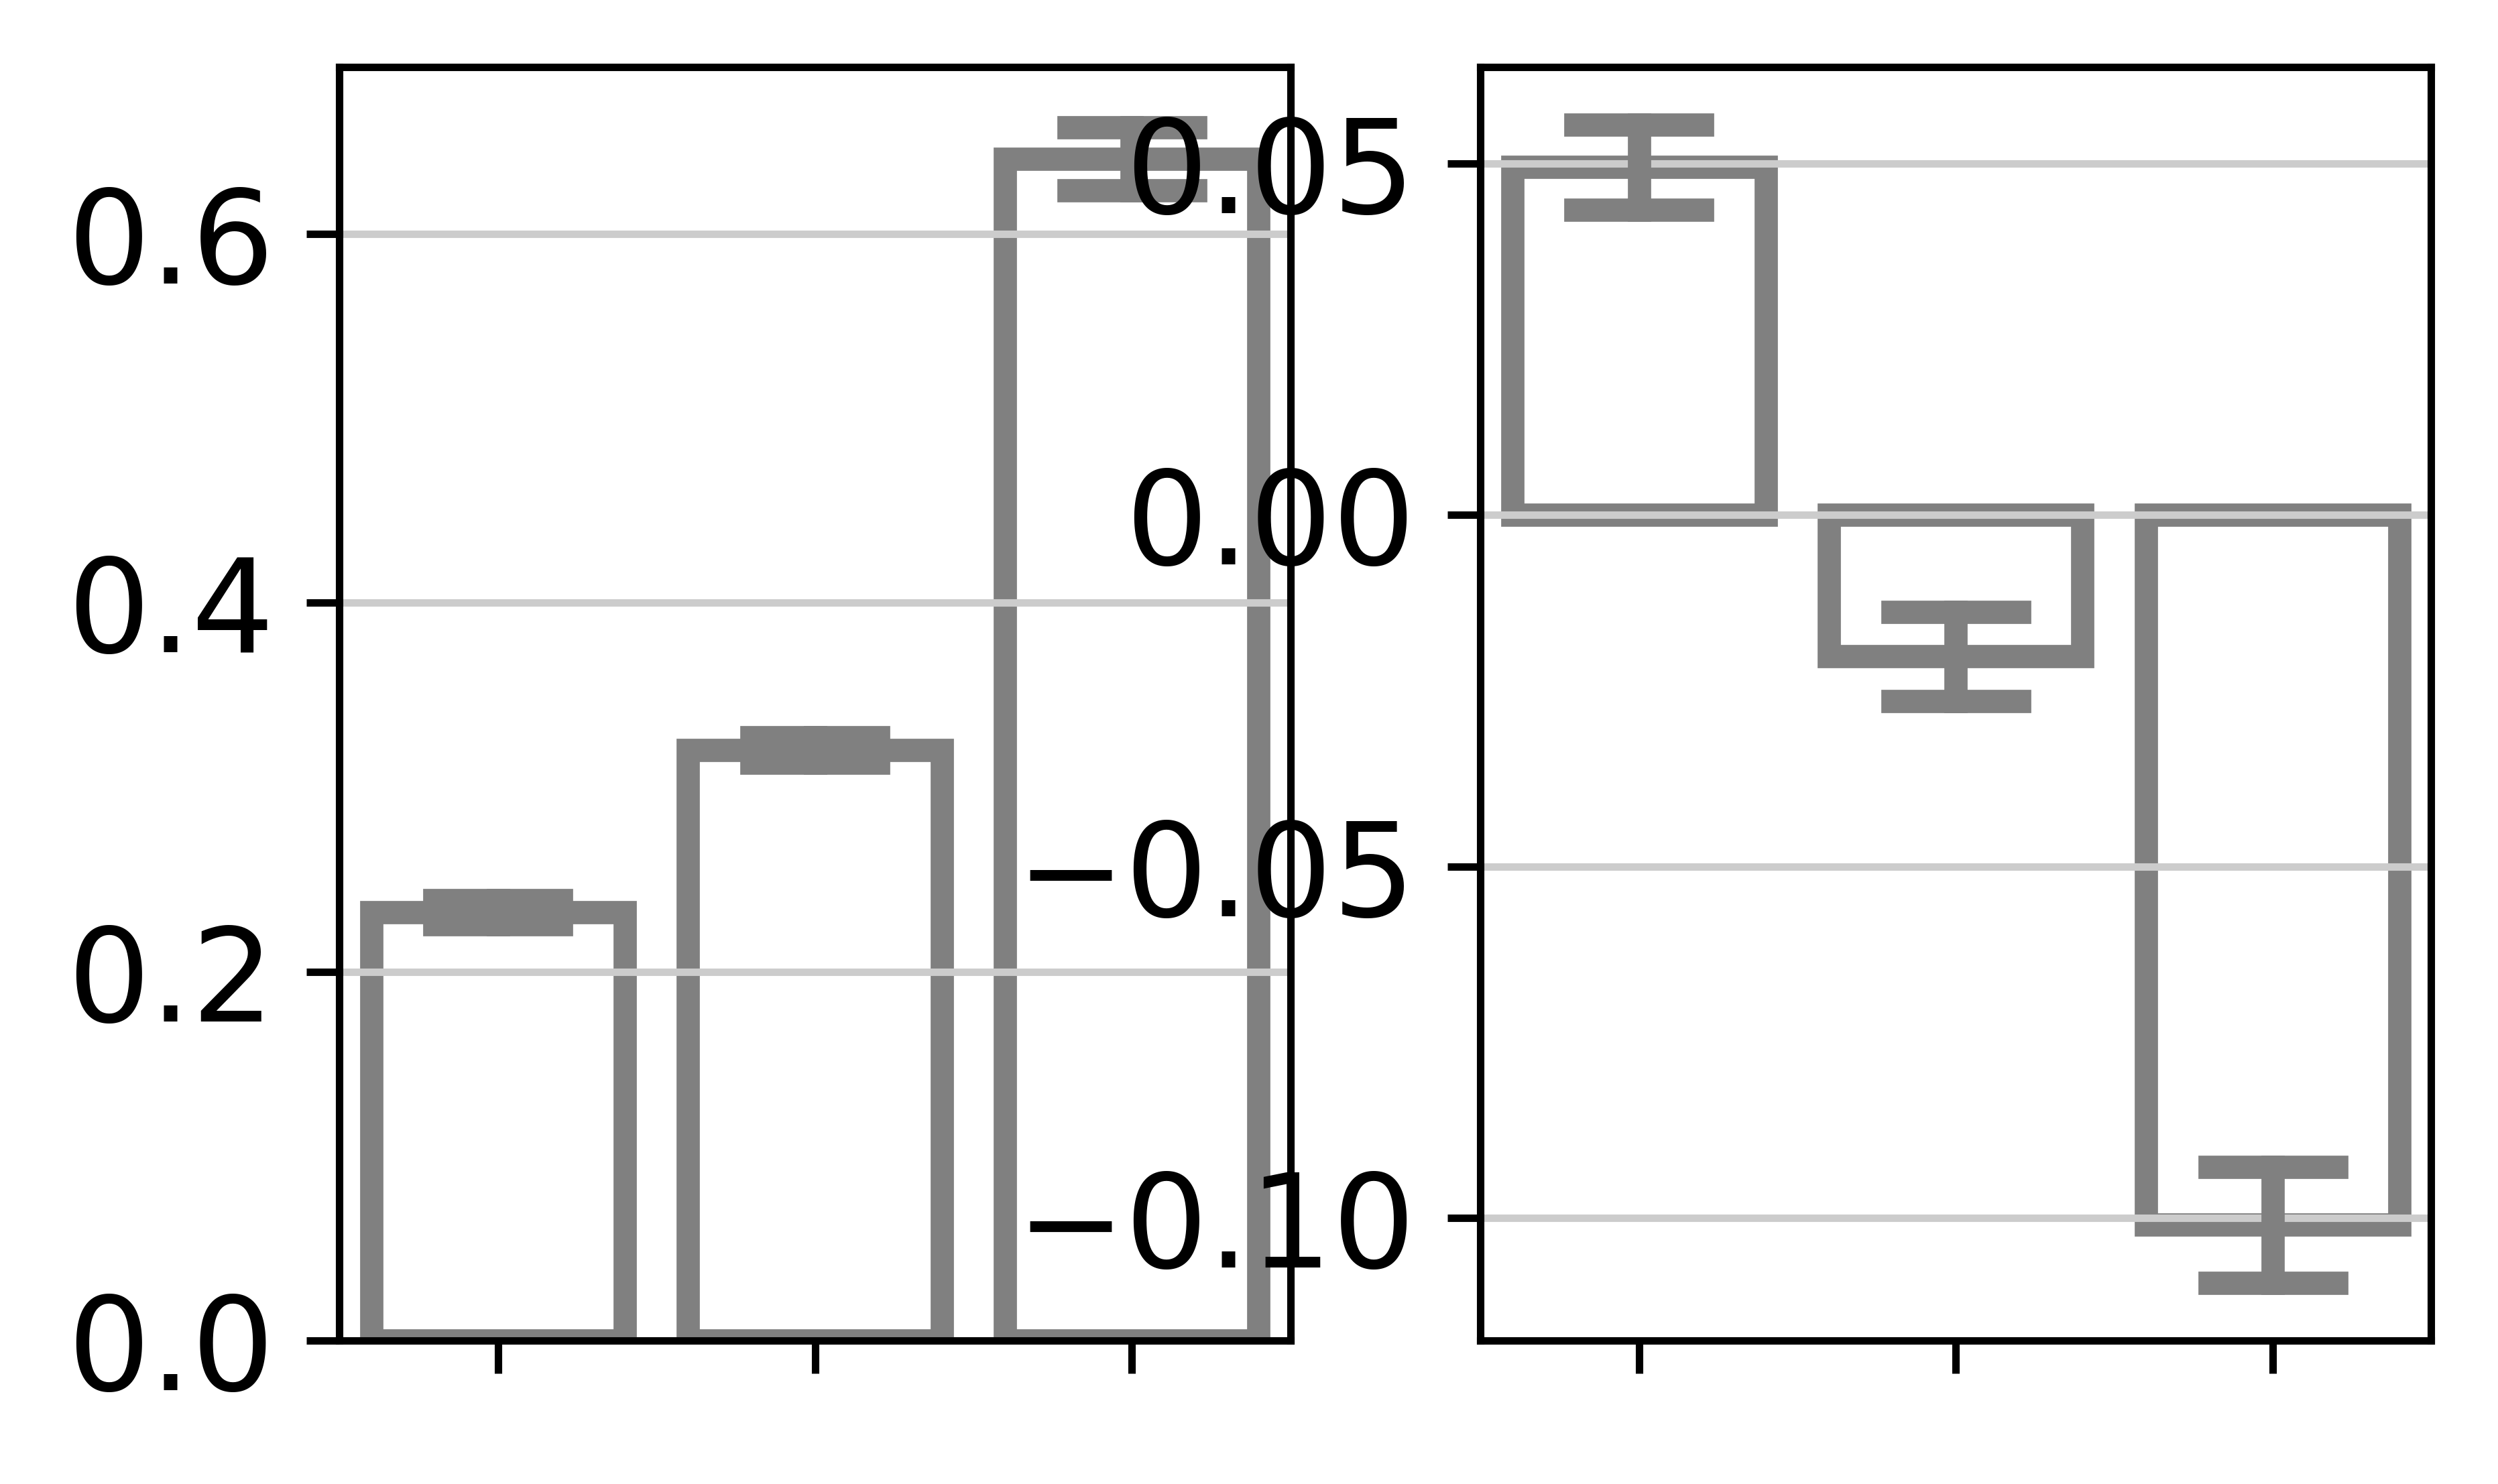

In [875]:
# plt.figure(figsize=(2, 3), dpi=500)
fig, axes = plt.subplots(1, 2, figsize=(4, 2.5), dpi=500,)
adata_joanito_tumorSamples_CD8T_obs_copy = adata_joanito_tumorSamples_CD8T.obs[(adata_joanito_tumorSamples_CD8T.obs['PatientID']!='SC035')].copy()

f1 = sns.barplot(data=adata_joanito_tumorSamples_CD8T_obs_copy, 
            x='PatientID', 
            y='CytotoxicScore', # NativeScore
            order=['CRC2817', 'CRC2783', 'SC044'],
            errorbar='se', capsize=.4, 
            err_kws={"color": ".5", "linewidth": 2.5},
            linewidth=2.5, 
            edgecolor=".5",
            facecolor=(0, 1, 0, 0), ax=axes[0],
            # hue='PatientID',
            # palette = { sns.color_palette('tab20c')[10], sns.color_palette('tab20c')[6], sns.color_palette('tab20c')[2], },
            )
f1.set_xticklabels([]);
# f1.set_yticklabels([]);
f1.set_xlabel('');
f1.set_ylabel('');

f2 = sns.barplot(data=adata_joanito_tumorSamples_CD8T_obs_copy, 
            x='PatientID', 
            y='NativeScore', # NativeScore
            order=['CRC2817', 'CRC2783', 'SC044'],
            errorbar='se', capsize=.4, 
            err_kws={"color": ".5", "linewidth": 2.5},
            linewidth=2.5, 
            edgecolor=".5",
            facecolor=(0, 1, 0, 0), ax=axes[1],
            # hue='PatientID',
            # palette = { sns.color_palette('tab20c')[10], sns.color_palette('tab20c')[6], sns.color_palette('tab20c')[2], },
            )
f2.set_xticklabels([]);
# f2.set_yticklabels([]);
f2.set_xlabel('');
f2.set_ylabel('');

# fig.tight_layout();

# sns.barplot(data=adata_joanito_tumorSamples_CD8T.obs, x='PatientID', y='CytotoxicScore', order=PatientOrder)

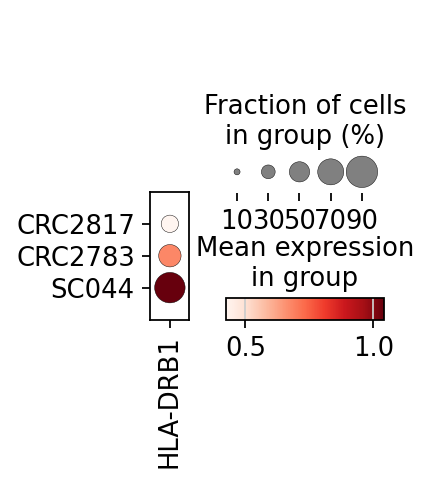

In [877]:
sc.pl.dotplot(adata_joanito_tumorSamples_CD8T, var_names=['HLA-DRB1'], groupby='PatientID', categories_order=['CRC2817', 'CRC2783', 'SC044'])

## Chen

In [319]:
adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.h5ad')

In [323]:
dict_Identifier_to_lvl_1_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl1.pickle')

dict_Identifier_to_lvl_2_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl2.pickle')

dict_Identifier_to_lvl_1_CellType_Total,  dict_Identifier_to_lvl_2_CellType_Total = dict(), dict()

for k,v in dict_Identifier_to_lvl_1_CellType_1.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_2.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_3.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v

for k,v in dict_Identifier_to_lvl_2_CellType_1.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_2.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_3.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v

temp = list()
for tup in adata_chen.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'N/A':
        temp.append( dict_Identifier_to_lvl_1_CellType_Total[tup.Identifier] )
    else:
        temp.append( tup.Manual_CellType_lvl_1 )

adata_chen.obs['Manual_CellType_lvl_1'] = temp

temp = list()
for tup in adata_chen.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'Tumor epithelial':
        temp.append( tup.Manual_CellType_lvl_1 )
    else:
        temp.append( dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier] )

adata_chen.obs['Manual_CellType_lvl_2'] = temp

In [599]:
adata_chen_tumorSamples  = adata_chen[adata_chen.obs['BiopsySite']=='Tumor'].copy()
adata_chen_normalSamples = adata_chen[adata_chen.obs['BiopsySite']!='Tumor'].copy()

In [600]:
adata_chen_tumorSamples_tumorEpi = adata_chen_tumorSamples[adata_chen_tumorSamples.obs['Manual_CellType_lvl_2']=='Tumor epithelial']
adata_chen_tumorSamples_tumorEpi = adata_chen_tumorSamples_tumorEpi.raw.to_adata()
sc.pp.normalize_total(adata_chen_tumorSamples_tumorEpi)
sc.pp.log1p(adata_chen_tumorSamples_tumorEpi)

adata_chen_normalSamples_normalEpi = adata_chen_normalSamples[(adata_chen_normalSamples.obs['Manual_CellType_lvl_1']=='Normal epithelial') & 
                                                                  (adata_chen_normalSamples.obs['Manual_CellType_lvl_2']!='Tumor epithelial') &
                                                                 (adata_chen_normalSamples.obs['MSI']=='MSI')].copy()
adata_chen_normalSamples_normalEpi = adata_chen_normalSamples_normalEpi.raw.to_adata()
sc.pp.normalize_total(adata_chen_normalSamples_normalEpi)
sc.pp.log1p(adata_chen_normalSamples_normalEpi)

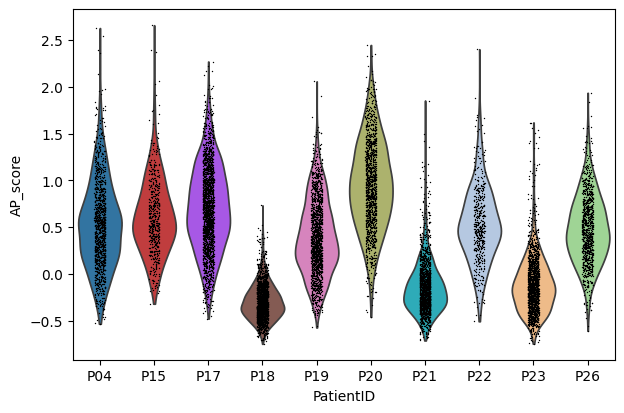

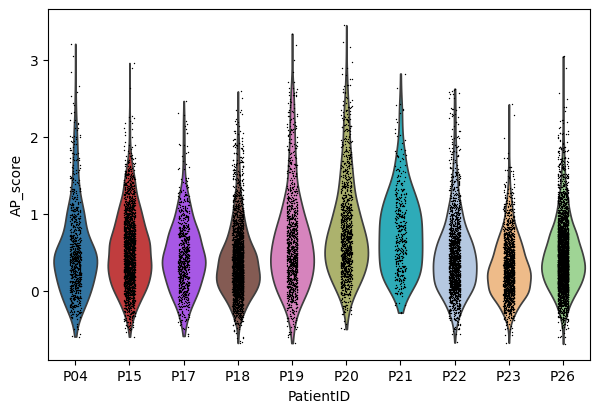

In [592]:
sc.tl.score_genes(adata_chen_tumorSamples_tumorEpi, ['HLA-A', 'HLA-B', 'HLA-C', 'B2M'], score_name='AP_score')
sc.tl.score_genes(adata_chen_normalSamples_normalEpi, ['HLA-A', 'HLA-B', 'HLA-C', 'B2M'], score_name='AP_score')
sc.pl.violin(adata_chen_tumorSamples_tumorEpi, keys='AP_score', groupby='PatientID')
sc.pl.violin(adata_chen_normalSamples_normalEpi, keys='AP_score', groupby='PatientID')

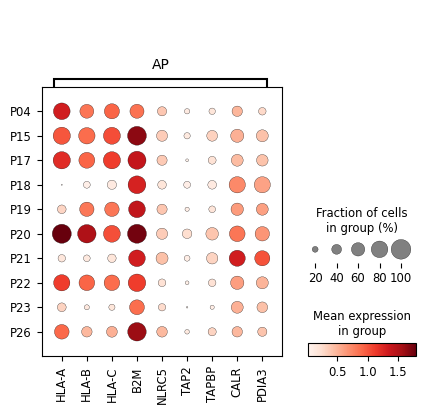

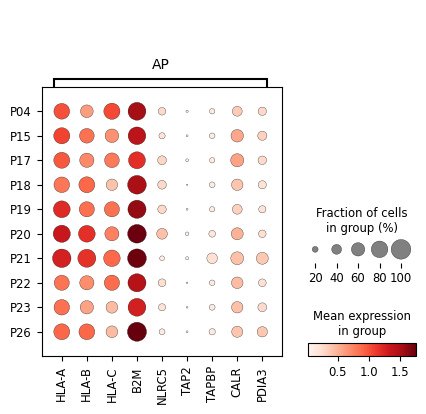

In [590]:
sc.pl.dotplot(adata_chen_tumorSamples_tumorEpi, var_names={'AP' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'CIITA', 'TAP2', 'TAPBP', 'CALR', 'PDIA3']}, groupby='PatientID')
sc.pl.dotplot(adata_chen_normalSamples_normalEpi, var_names={'AP' : ['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'CIITA', 'TAP2', 'TAPBP', 'CALR', 'PDIA3']}, groupby='PatientID')

In [371]:
adata_chen_tumorSamples = adata_chen_tumorSamples[~adata_chen_tumorSamples.obs['PatientID'].isin(['P18', 'P19', 'P21', 'P23'])].copy()
adata_chen_normalSamples = adata_chen_normalSamples[~adata_chen_normalSamples.obs['PatientID'].isin(['P18', 'P19', 'P21', 'P23'])].copy()

In [938]:
adata_chen_tumorSamples_CD8T = adata_chen_tumorSamples[adata_chen_tumorSamples.obs['Manual_CellType_lvl_2'].isin(['CD8+ T',])]
adata_chen_tumorSamples_CD8T = adata_chen_tumorSamples_CD8T.raw.to_adata()
sc.pp.normalize_total(adata_chen_tumorSamples_CD8T)
sc.pp.log1p(adata_chen_tumorSamples_CD8T)

In [942]:
activation_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM', 'PRF1']
naive_genes = ['CCR7', 'SELL', 'IL7R', 'LEF1', 'TCF7']

sc.tl.score_genes(adata_chen_tumorSamples_CD8T, gene_list=cytotoxic_genes, score_name='CytotoxicScore')
sc.tl.score_genes(adata_chen_tumorSamples_CD8T, gene_list=native_genes, score_name='NativeScore')

In [943]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
# chen_patient_order_by_MSI_intensity     = ['P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']

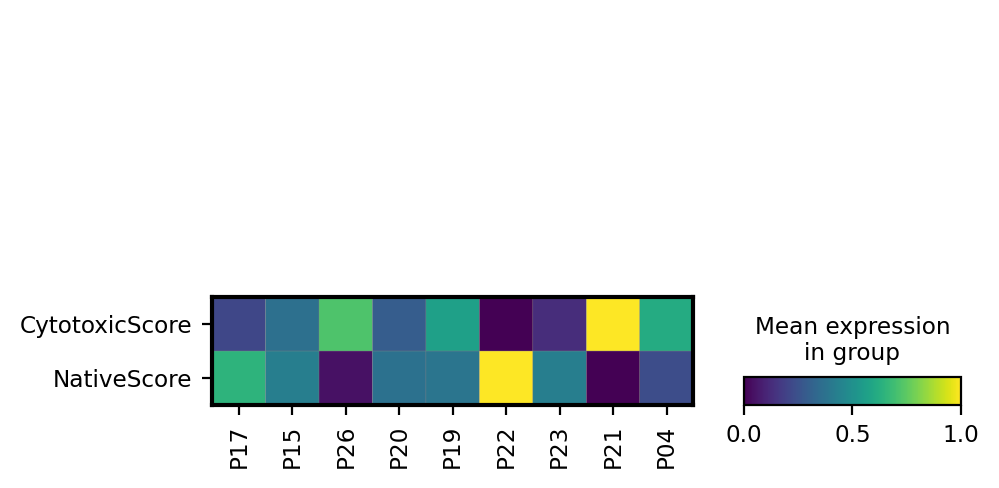

In [930]:
sc.pl.matrixplot(adata_chen_tumorSamples_CD8T[adata_chen_tumorSamples_CD8T.obs['PatientID']!='P18'], 
                 var_names=['CytotoxicScore', 'NativeScore', ], 
                 groupby='PatientID', 
                 categories_order=chen_patient_order_by_MSI_intensity, 
                 swap_axes=True, 
                 standard_scale='var',
                 )

In [931]:
set(adata_chen_tumorSamples_CD8T.obs[adata_chen_tumorSamples_CD8T.obs['Response']=='PR']['PatientID'])

{'P15', 'P17', 'P19'}

<Axes: xlabel='PatientID', ylabel='CytotoxicScore'>

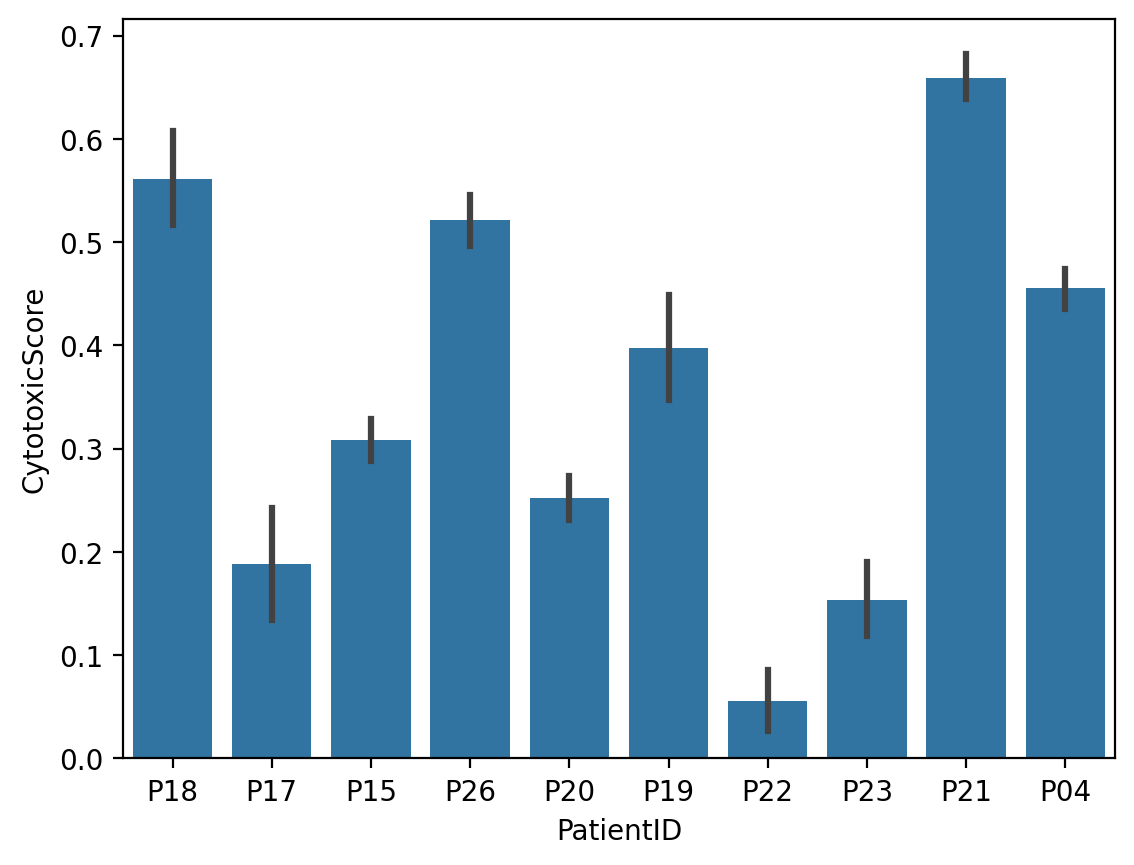

In [949]:
sns.barplot(adata_chen_tumorSamples_CD8T.obs, y='CytotoxicScore', x='PatientID', order=chen_patient_order_by_MSI_intensity)

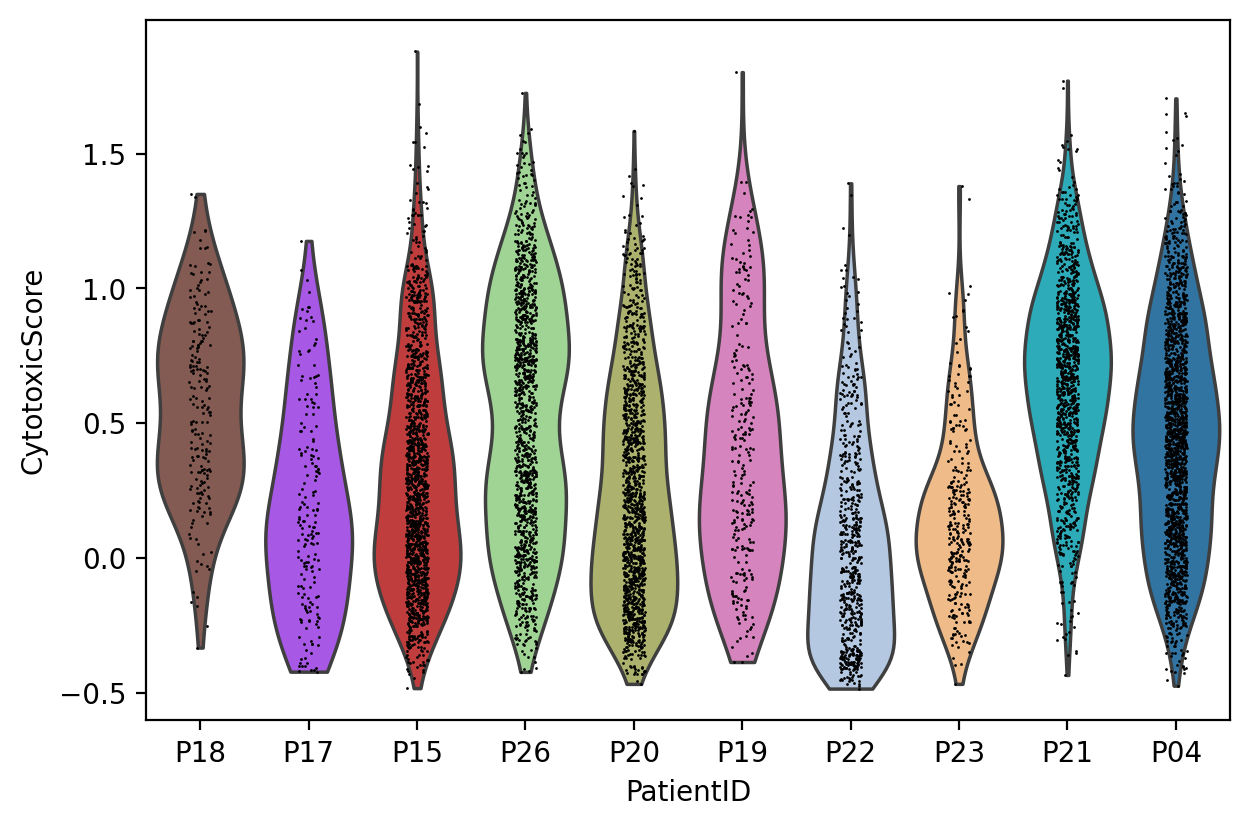

In [948]:
sc.pl.violin(adata_chen_tumorSamples_CD8T, keys=['CytotoxicScore'], groupby='PatientID', order=chen_patient_order_by_MSI_intensity)

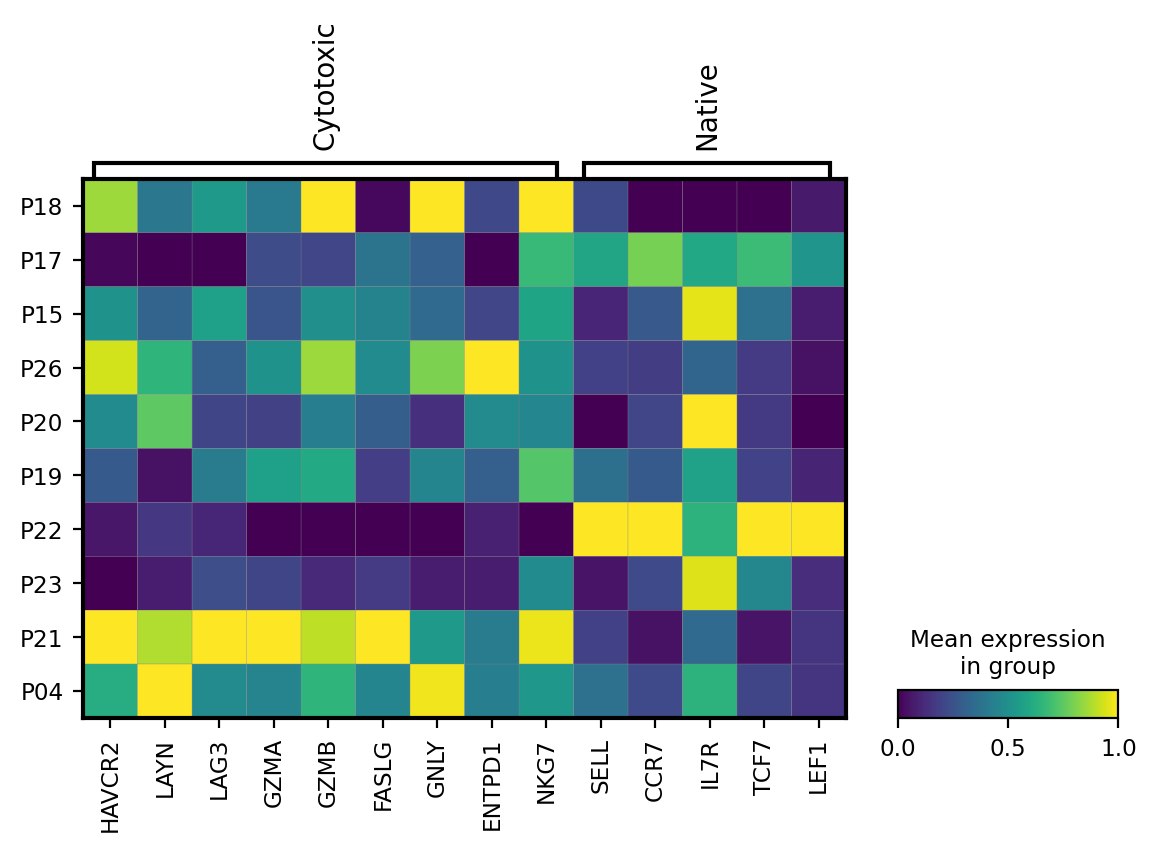

In [950]:
sc.pl.matrixplot(adata_chen_tumorSamples_CD8T, 
                 var_names=dict_genes, 
                 groupby='PatientID',
                 categories_order=chen_patient_order_by_MSI_intensity, 
                 swap_axes=False, 
                 standard_scale='var',
                 )

## Temp

In [ ]:
SGBulkMtx = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG-BULK/SG-BULK_salmonTPM.csv')
SGBulkMtx.rename( {'Unnamed: 0': 'gene_id'}, axis=1, inplace=True )
SGBulkMtx.shape

gtf = pd.read_csv('/node200data/18parkky/datasets/reference/transcriptome/GFF/gencode.v47.basic.annotation.labeled.gtf', sep='\t')
dict_ENSG_to_genename = { tup.ENSG.split('.')[0] : tup.gene_name for tup in gtf.itertuples() }
for gi in SGBulkMtx['gene_id']:
    try: dict_ENSG_to_genename[gi]
    except KeyError: dict_ENSG_to_genename[gi] = None
SGBulkMtx['gene_name'] = [ dict_ENSG_to_genename[gi] for gi in SGBulkMtx['gene_id'] ]

In [1026]:
SGBulkMtx

,gene_id,1504,1603,1324,904,834,47,1477,1298,1037,...,1076,1066,1464,1165,1607,1448,891,858,1614,gene_name
0,ENSG00000000003,21.899490,23.051914,17.759606,19.887544,10.718835,10.178540,15.664737,6.391909,8.080226,...,19.493468,8.679017,18.199760,6.008192,23.451535,22.468734,5.567352,12.708013,17.797957,TSPAN6
1,ENSG00000000005,0.201798,0.336181,0.321224,0.495977,0.092844,0.162886,0.979404,0.240270,0.091914,...,1.416982,0.039388,0.160707,0.085678,0.108787,0.633003,0.110154,0.473068,0.157542,TNMD
2,ENSG00000000419,24.813475,32.488898,73.592613,17.660135,22.659393,9.907228,26.220157,8.971716,8.427556,...,38.668035,19.646647,19.240425,16.253209,17.911861,23.361645,10.611309,9.516005,11.413409,DPM1
3,ENSG00000000457,2.385601,3.491298,3.189865,3.426733,2.741735,3.501638,3.163172,3.273375,2.039018,...,4.182547,4.466471,5.350908,4.772413,3.298083,4.886279,7.648380,3.676741,5.313049,SCYL3
4,ENSG00000000460,2.423479,4.838602,4.491900,2.546456,3.737818,1.934962,5.378430,2.950694,2.152042,...,6.068358,3.514042,4.984912,4.211540,4.157520,5.240244,4.337681,2.140315,1.901577,FIRRM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59596,ENSG00000273487,0.827590,0.683941,0.834527,0.857493,0.663991,0.685163,0.652783,0.528673,0.319231,...,0.820072,0.618836,0.542489,1.100744,0.664464,0.908923,0.818516,0.848681,0.711752,ENSG00000273487
59597,ENSG00000273488,1.265823,2.057645,1.717848,1.950747,2.913155,0.803338,2.062527,1.550555,1.152944,...,1.142128,1.362096,1.929154,1.438019,1.348397,4.335782,1.862890,2.202075,2.756163,None
59598,ENSG00000273489,0.232299,0.171759,0.297231,0.535864,0.153239,0.109675,0.130677,0.119481,0.161624,...,0.290585,0.356456,0.240291,0.211654,0.287666,0.456989,0.248921,0.223861,0.366904,ENSG00000273489
59599,ENSG00000273492,1.413037,1.414762,1.526064,1.535159,1.518512,1.472148,1.486238,1.191435,0.539999,...,1.665379,1.434887,1.418916,1.509496,1.164592,1.737887,1.425941,1.933930,2.115077,APP-DT
